## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2023:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOGL)
* Meta (NASDAQ:META).

Using Pandas, yfinance, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2023. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np


#### Step 2: Import Financial Package
Import the `yfinance` module as `yf`. (you can install the `yfinance` package by entering `pip3 install yfinance` in the command line or `!pip3 install yfinance` in the Jupyter Notebook)

You can learn more about the yfinance package by visiting its [github homepage](https://github.com/ranaroussi/yfinance#readme). Also take a look at the [dependency requirements](https://github.com/ranaroussi/yfinance#requirements) to check that your Python, Pandas, and Numpy versions are compatible for working with yfinance.

In [2]:
import yfinance as yf

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2023 named `start_date` and a datetime object representing July 1st, 2023 named `end_date`.
#### Step 3: Retrieve Data
Call the function `yf.download()` to pull historical data for multiple stocks. `.download()` should take three arguments &mdash; the first is a positional argument that holds the list of stock symbols for which we'd like to download data. The second and third arguments should be keyword arguments `start` and `end`, which should be set to `start_date` and `end_date` respectively. Save the result to a variable called `stock_data`. You can read more about the `.download()` method on the [yfinance wiki](https://github.com/ranaroussi/yfinance/wiki/Tickers#download)
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOGL", "META"]
start_date = "2023-01-01"
end_date = "2023-07-01"
stock_data = yf.download(symbols, start=start_date, end=end_date)
stock_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2023-01-03  123.632530   85.820000   88.695946  124.154854  235.240036   
2023-01-04  124.907700   85.139999   87.660904  126.772530  224.949890   
2023-01-05  123.583107   83.120003   85.789841  126.344543  218.282883   
2023-01-06  128.130219   86.080002   86.924423  129.410110  220.855408   
2023-01-09  128.654144   87.360001   87.601181  128.862686  223.005737   
...                ...         ...         ...         ...         ...   
2023-06-26  183.673965  127.330002  117.776917  277.163727  324.162689   
2023-06-27  186.439926  129.179993  117.766960  285.703491  330.052032   
2023-06-28  187.619690  129.039993  119.608154  283.951752  331.314758   
2023-06-29  187.956741  127.900002  118.533295  280.209381  330.525543   
2023-06-30  192.299026  130.360001  119.130432  285.633820  335.941437   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT  ...   
Date                                                                    ...   
2023-01-03  129.395518   86.959999   90.616763  125.777212  241.298265  ...   
2023-01-04  127.181268   86.980003   90.218675  128.444649  228.651586  ...   
2023-01-05  126.301500   85.419998   87.153325  127.917134  223.427966  ...   
2023-01-06  128.792516   86.400002   87.272764  129.718654  221.670374  ...   
2023-01-09  131.876686   89.480003   89.621528  132.326358  227.051114  ...   
...                ...         ...         ...         ...         ...  ...   
2023-06-26  186.430015  131.490005  121.419505  288.430633  331.571256  ...   
2023-06-27  186.767085  130.089996  118.513391  287.992721  331.610683  ...   
2023-06-28  188.264084  131.479996  119.817154  288.191748  333.416000  ...   
2023-06-29  188.432617  129.259995  119.488726  285.225748  331.571227  ...   
2023-06-30  192.804628  131.250000  120.503871  287.694086  338.101866  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2023-01-03  128.782649   85.459999   89.163703  122.243862  238.676634   
2023-01-04  125.431607   86.550003   89.920100  126.782477  228.072278   
2023-01-05  125.668857   85.330002   87.053802  125.538338  223.084300   
2023-01-06  124.561717   83.029999   86.377045  128.365033  218.960377   
2023-01-09  128.970474   87.459999   87.939567  130.544761  222.347876   
...                ...         ...         ...         ...         ...   
2023-06-26  185.220524  129.330002  120.185408  287.345750  329.213545   
2023-06-27  184.288622  128.630005  116.522908  280.687155  327.378606   
2023-06-28  186.311054  128.940002  116.532853  283.483955  330.140825   
2023-06-29  187.451140  128.770004  118.672628  283.165450  330.190138   
2023-06-30  189.979188  129.470001  119.598197  283.424232  333.189104   

Price          Volume                                          
Ticker           AAPL      AMZN     GOOGL      META      MSFT  
Date                                                           
2023-01-03  112117500  76706000  28131200  35528500  25740000  
2023-01-04   89113600  68885100  34854800  32397100  50623400  
2023-01-05   80962700  67930800  27194400  25447100  39585600  
2023-01-06   87754700  83303400  41381500  27584500  43613600  
2023-01-09   70790800  65266100  29003900  26649100  27369800  
...               ...       ...       ...       ...       ...  
2023-06-26   48088700  59989300  33969900  24232700  21520600  
2023-06-27   50730800  46801000  39535900  26108300  24354100  
2023-06-28   51216800  52149500  27091400  16722100  20259500  
2023-06-29   46347300  40761000  24090900  15395700

In [5]:
stock_data['Close']

Ticker,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2023-01-03,123.632530,85.820000,88.695946,124.154854,235.240036
2023-01-04,124.907700,85.139999,87.660904,126.772530,224.949890
2023-01-05,123.583107,83.120003,85.789841,126.344543,218.282883
2023-01-06,128.130219,86.080002,86.924423,129.410110,220.855408
2023-01-09,128.654144,87.360001,87.601181,128.862686,223.005737
...,...,...,...,...,...
2023-06-26,183.673965,127.330002,117.776917,277.163727,324.162689
2023-06-27,186.439926,129.179993,117.766960,285.703491,330.052032
2023-06-28,187.619690,129.039993,119.608154,283.951752,331.314758


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

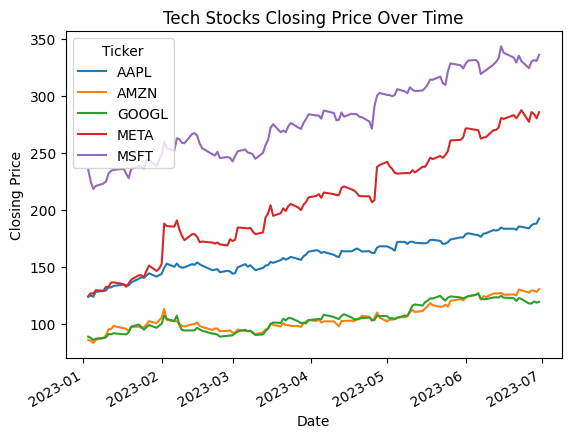

In [6]:
stock_data_closing_prices = stock_data['Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Tech Stocks Closing Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

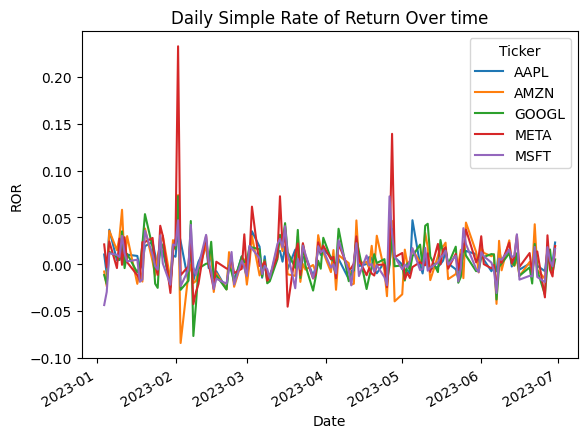

<Figure size 1600x900 with 0 Axes>

In [7]:
stock_data_daily_returns = stock_data['Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

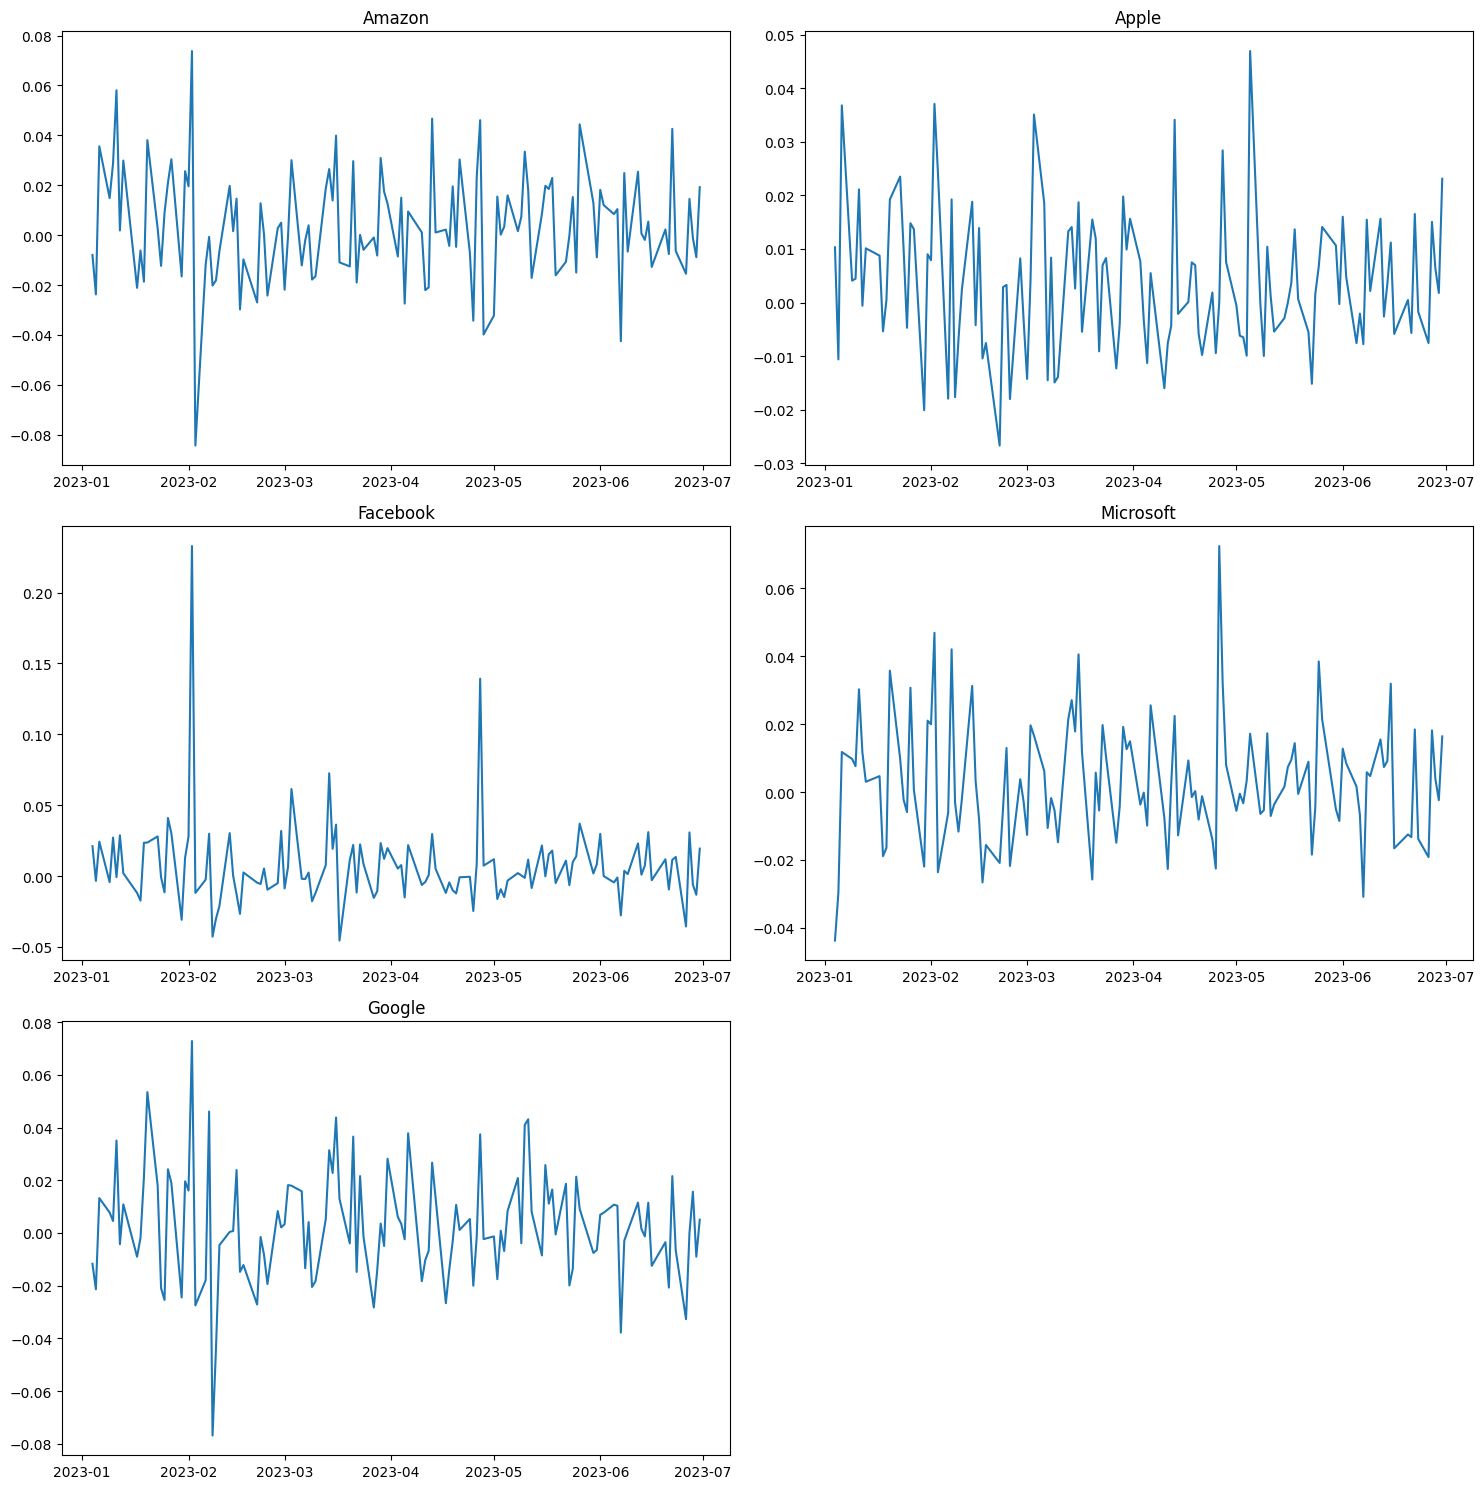

In [9]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Close']['META'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Close']['GOOGL'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [10]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Ticker
AAPL     0.003682
AMZN     0.003652
GOOGL    0.002619
META     0.007224
MSFT     0.003060
dtype: float64

In [11]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object', name='Ticker')

In [12]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[np.float64(0.0036817842229376623),
 np.float64(0.0036520392611041766),
 np.float64(0.002619028480950206),
 np.float64(0.007223537357126227),
 np.float64(0.0030603258294261792)]

In [13]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

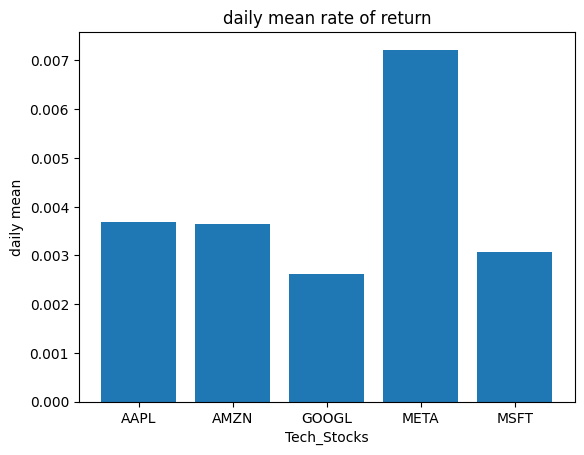

In [14]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Meta has the highest mean simple rate of return over the period of data collected. Thus Meta would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [15]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

Ticker
AAPL     0.000171
AMZN     0.000500
GOOGL    0.000440
META     0.000931
MSFT     0.000324
dtype: float64

In [16]:
# variance index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object', name='Ticker')

In [17]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[np.float64(0.00017069085785785692),
 np.float64(0.0004996417511013153),
 np.float64(0.0004400439059192139),
 np.float64(0.0009308604527895462),
 np.float64(0.00032376378055740265)]

In [18]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

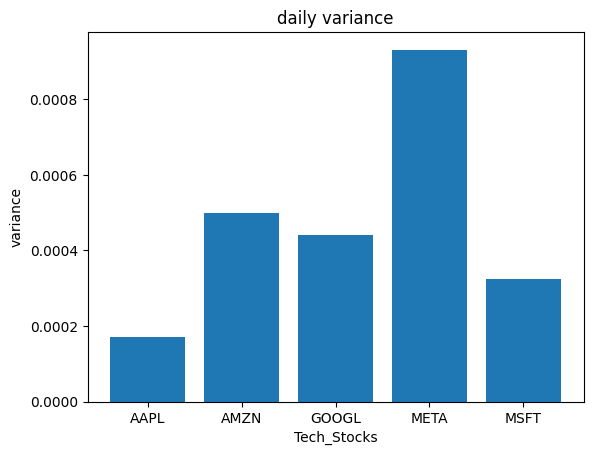

In [19]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Meta shows the highest variance of all the stocks, indicating it can be a riskier investment. Apple shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [20]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

Ticker
AAPL     0.013065
AMZN     0.022353
GOOGL    0.020977
META     0.030510
MSFT     0.017993
dtype: float64

In [21]:
# standard deviation index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT'], dtype='object', name='Ticker')

In [22]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[np.float64(0.013064871138203274),
 np.float64(0.02235266765067014),
 np.float64(0.02097722350358154),
 np.float64(0.03051000578153905),
 np.float64(0.017993437152400947)]

In [23]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

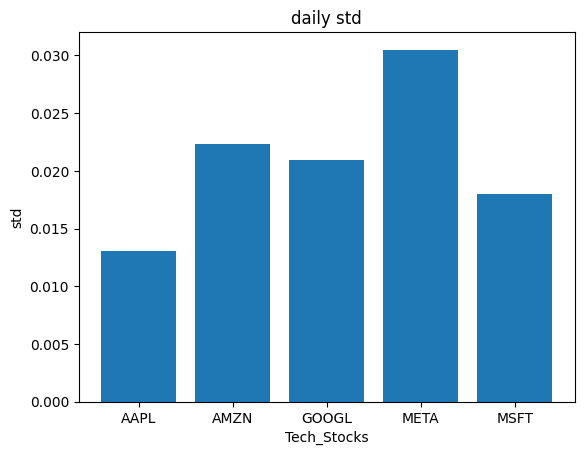

In [24]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Meta is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Apple, on the other hand, is the least volatile stock, but has a lower mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [25]:
stock_data_daily_returns.corr()

Ticker,AAPL,AMZN,GOOGL,META,MSFT
Ticker,,,,,
AAPL,1.000000,0.555239,0.599271,0.578896,0.583446
AMZN,0.555239,1.000000,0.630500,0.578416,0.644662
GOOGL,0.599271,0.630500,1.000000,0.621096,0.628548
META,0.578896,0.578416,0.621096,1.000000,0.533364
MSFT,0.583446,0.644662,0.628548,0.533364,1.000000


None of the stocks are negatively correlated. Microsoft and Amazon have the highest correlation, while Meta and Microsoft exhibit the lowest correlation.